In [61]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
%matplotlib inline

In [37]:
df=pd.read_csv('titanic.csv')[['Survived','Pclass','Age','Embarked']]
df.head()

,Survived,Pclass,Age,Embarked
0,0,3,22.0,S
1,1,1,38.0,C
2,1,3,26.0,S
3,1,1,35.0,S
4,0,3,35.0,S


In [40]:
df.drop('Embarked',axis=1,inplace=True)

In [44]:
df.head()

,Survived,Pclass,Age
0,0,3,22.0
1,1,1,38.0
2,1,3,26.0
3,1,1,35.0
4,0,3,35.0


In [43]:
df.isna().sum()

Survived      0
Pclass        0
Age         177
dtype: int64

In [45]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('Survived',axis=1),df['Survived'],test_size=0.2,random_state=42)

In [48]:
X_train.head()

,Pclass,Age
331,1,45.5
733,2,23.0
382,3,32.0
704,3,26.0
813,3,6.0


In [49]:
X_test.head()

,Pclass,Age
709,3,NaN
439,2,31.0
840,3,20.0
720,2,6.0
39,3,14.0


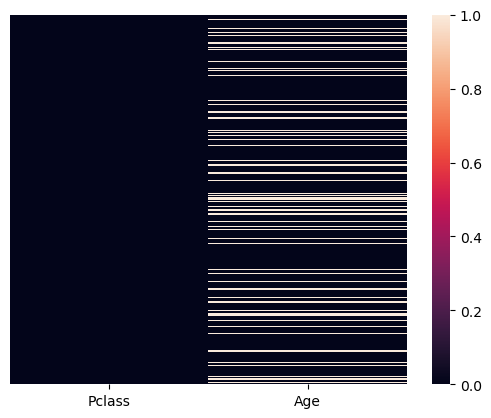

In [50]:
sns.heatmap(X_train.isna(),yticklabels=False,)
plt.show()

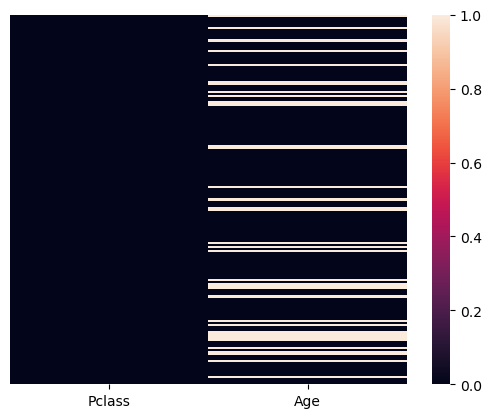

In [51]:
sns.heatmap(X_test.isna(),yticklabels=False,)
plt.show()

### Fitting X_train with knn 

In [54]:
Knnimpute=KNNImputer() # creating objet class of knn imputer 
X_train_transf=Knnimpute.fit_transform(X_train)
X_test_transf=Knnimpute.transform(X_test)

In [58]:
newdata=pd.DataFrame(X_train_transf,columns=X_train.columns)
newdata

,Pclass,Age
0,1.0,45.5
1,2.0,23.0
2,3.0,32.0
3,3.0,26.0
4,3.0,6.0
...,...,...
707,3.0,21.0
708,1.0,47.6
709,3.0,41.0
710,1.0,14.0


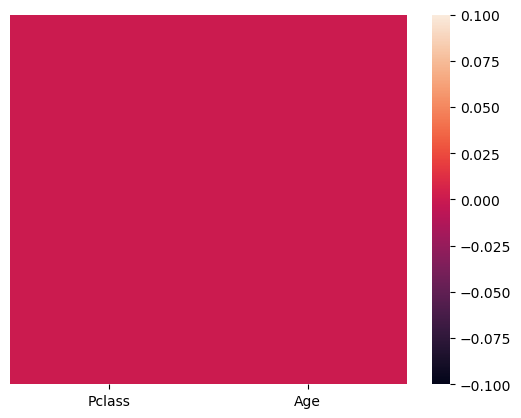

In [64]:
sns.heatmap(newdata.isna(),yticklabels=False)
plt.show() # this shows that datas have been imputed with knn imputer with nearest neighbor techniques 

In [59]:
newdata.isnull().sum()

Pclass    0
Age       0
dtype: int64

In [63]:
Lr=LogisticRegression()
Lr.fit(X_train_transf,y_train)
y_pred=Lr.predict(X_test_transf)
print(accuracy_score(y_test,y_pred)*100)

74.86033519553072


### finding optimal K 

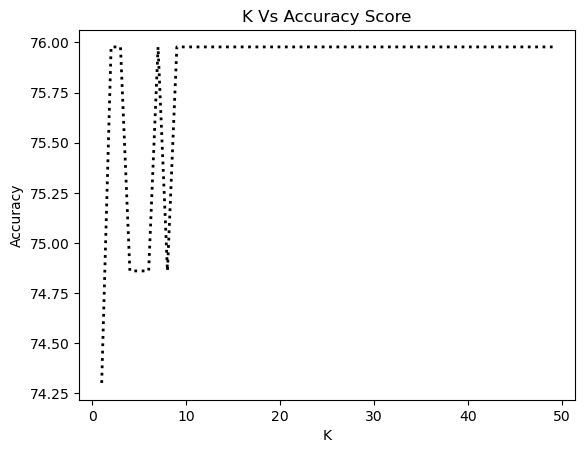

Optimal Accuracy score is: 75.97765363128491


In [87]:
score=[]
count=[]
for k in range(1,50):
    Knnimpute=KNNImputer(n_neighbors=k) # creating objet class of knn imputer 
    X_train_transf=Knnimpute.fit_transform(X_train)
    X_test_transf=Knnimpute.transform(X_test)
    #prediction and accuracy test
    Lr=LogisticRegression()
    Lr.fit(X_train_transf,y_train)
    y_pred=Lr.predict(X_test_transf)
    score.append(accuracy_score(y_test,y_pred)*100)
    count.append(k)
plt.plot(count,score,color='black',linewidth=2,linestyle='dotted')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('K Vs Accuracy Score')
plt.show()
print(f'Optimal Accuracy score is: {score[-1]}')